<a href="https://colab.research.google.com/github/RabihSouiden/Ciencias-de-a-computacion/blob/main/Reporte__Delitos_Sexuales_Policia_Nacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importamos pandas-profiling

In [ ]:
 pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

     - 25.9 MB 60.5 MB/s
     |████████████████████████████████| 10.9 MB 8.1 MB/s 
     |████████████████████████████████| 596 kB 39.6 MB/s 
     |████████████████████████████████| 102 kB 5.6 MB/s 
     |████████████████████████████████| 675 kB 17.4 MB/s 
     |████████████████████████████████| 4.7 MB 8.1 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 812 kB 18.4 MB/s 
     |████████████████████████████████| 38.1 MB 2.6 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.1.1-py2.py3-none-any.whl size=261287 sha256=a6e573caaeab324c6b7c6cb6d44794a3f7a24e3acd9958309fd460a3031bb214
  Stored in directory: /tmp/pip-ephem-wheel-cache-dp5kyto4/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=08431d8a2288da3b5b58dbef94fedd2afd400b55c68fb287f71413a372e8427f
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d

# Extraemos los datos

In [88]:
import pandas as pd
from pandas_profiling import ProfileReport

df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQ41Soi597A32TTvqOBb07TzGE8gJLFlkC81Mxr8efSDzgyO0YGq-K8cb-CAmi7n9cIMxm0IfxsasVm/pub?gid=100694393&single=true&output=csv')


In [89]:
df = df.drop_duplicates()
df['FECHA HECHO'] = pd.to_datetime(df['FECHA HECHO'], format='%d/%m/%Y')
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD,delito
0,CAQUETÁ,SOLANO,18756000.0,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,MENORES,1,ARTÍCULO 209. ACTOS SEXUALES CON MENOR DE 14 AÑOS
1,BOLÍVAR,CARTAGENA (CT),13001000.0,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADOLECENTES,1,ARTÍCULO 205. ACCESO CARNAL VIOLENTO
2,HUILA,LA PLATA,41396000.0,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1,ARTÍCULO 205. ACCESO CARNAL VIOLENTO
3,SANTANDER,PIEDECUESTA,68547000.0,CONTUNDENTES,2010-01-01,FEMENINO,ADULTOS,1,ARTÍCULO 205. ACCESO CARNAL VIOLENTO
4,META,VILLAVICENCIO (CT),50001000.0,CONTUNDENTES,2010-01-01,FEMENINO,ADULTOS,1,ARTÍCULO 205. ACCESO CARNAL VIOLENTO


# Generamos el Reporte para explorar los datos

In [90]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Punto 1
1.	¿Cuáles han sido los departamentos (TOP 3) más afectados a nivel histórico y en el último año?

Realizamos un filtrado sobre el ultimo año 2021
Se realiza un group by por departamento que no utilice indices nuevos, y nos sume la columna cantidad, la cual da la cantidad de delitps cometidos, luego organizamos los valores de cantidad de manera descendente y mostramos los 3 primeros datos

In [91]:
a = df
a['AÑO'] = pd.DatetimeIndex(df['FECHA HECHO']).year
cond1 = a['AÑO']== 2021
a = a[cond1]
a = a.groupby('DEPARTAMENTO', as_index=False)['CANTIDAD'].sum().sort_values(by=['CANTIDAD'], ascending=False).head(3)
a

,DEPARTAMENTO,CANTIDAD
12,CUNDINAMARCA,6971
1,ANTIOQUIA,4303
29,VALLE,2424


# Punto 2
2.	¿Cuál ha sido históricamente el arma o medio más común para cometer el delito?

Realizamos una agrupación de los datos por el arma medio sin generar otro indice y sumando la columna cantidad, así organizamos los valores por este valor y mostramos los 3 primeros datos

In [92]:
 b = df.groupby('ARMAS MEDIOS', as_index=False)['CANTIDAD'].sum().sort_values(by=['CANTIDAD'], ascending=False).head(3)
 b

,ARMAS MEDIOS,CANTIDAD
12,SIN EMPLEO DE ARMAS,113618
11,NO REPORTADO,63085
5,CONTUNDENTES,42986


# Punto 3
3.	¿Cómo es la proporción de géneros y grupos etarios que han estado involucrados en este tipo de delito? ¿Han variado con el paso de los años?

Realizamos la agrupación por dos columnas, Fecha y Genero.
Y realizamos un pivot a esa tabla, el pivot nos permite buscar las variables categoricas de la columna dada (Genero) y sumar los valores de la columna cantidad

In [94]:
#c = df[['GENERO','FECHA HECHO', 'CANTIDAD']]
c  = df.groupby(['FECHA HECHO', 'GENERO'])['CANTIDAD'].sum().reset_index()
#c.set_index('FECHA HECHO', inplace=True)
c = pd.pivot_table(c,index=["FECHA HECHO"], columns= 'GENERO', values='CANTIDAD')
c

GENERO,-,FEMENINO,MASCULINO,NO REPORTA
FECHA HECHO,,,,
2010-01-01,NaN,73.0,19.0,4.0
2010-01-02,NaN,23.0,4.0,NaN
2010-01-03,NaN,21.0,1.0,NaN
2010-01-04,NaN,23.0,1.0,NaN
2010-01-05,NaN,16.0,5.0,NaN
...,...,...,...,...
2021-12-27,NaN,40.0,6.0,1.0
2021-12-28,NaN,29.0,1.0,NaN
2021-12-29,NaN,26.0,5.0,NaN


Una vez tenemos organizados los datos procedemos a gráficar para visualizar mejor entre cada uno de los generos su cantidad a lo largo del tiempo

Utilizamos la libreria *matplotlib*

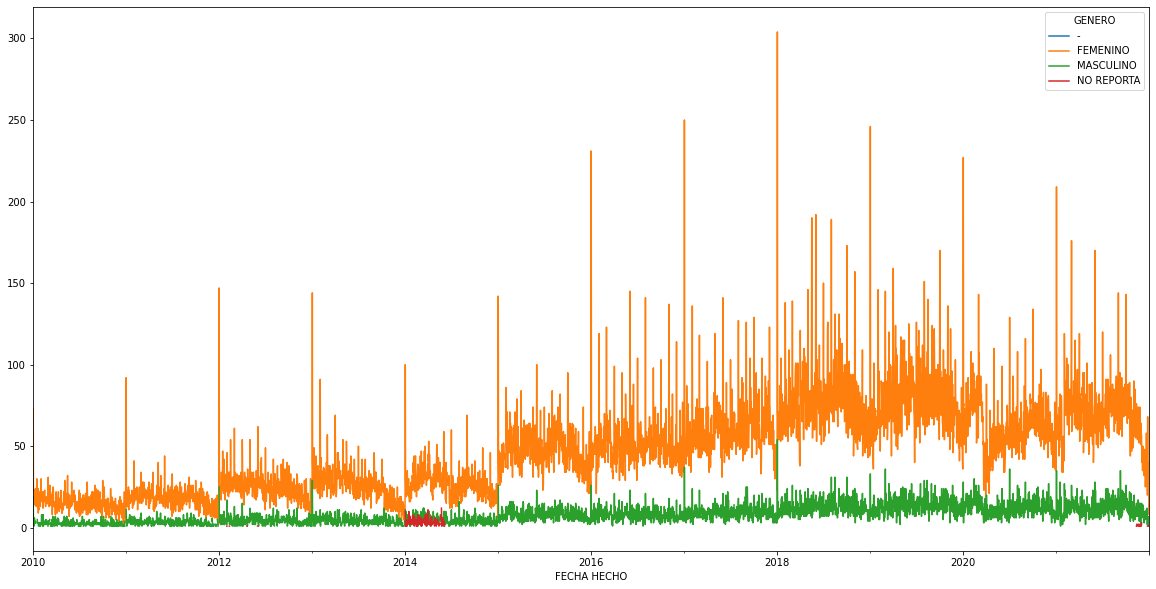

In [95]:
import matplotlib.pyplot as plt
%matplotlib inline

c.plot(figsize=(20,10))


# Punto 4
4.	¿Se evidencia alguna tendencia para cometer dicho delito en algún mes particular del año?

Para lograr resolver esta pregunta, primero separamos año y mes de la fecha de hecho.

In [96]:
d = df
d['AÑO'] = pd.DatetimeIndex(df['FECHA HECHO']).year
d['MES'] = pd.DatetimeIndex(df['FECHA HECHO']).month
d.tail()

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD,delito,AÑO,MES
252329,VICHADA,SANTA ROSALÍA,99624000.0,SIN EMPLEO DE ARMAS,2021-02-23,FEMENINO,MENORES,1,ARTÍCULO 208. ACCESO CARNAL ABUSIVO CON MENOR ...,2021,2
252330,VICHADA,SANTA ROSALÍA,99624000.0,SIN EMPLEO DE ARMAS,2021-07-24,MASCULINO,MENORES,1,ARTÍCULO 209. ACTOS SEXUALES CON MENOR DE 14 AÑOS,2021,7
252331,VICHADA,SANTA ROSALÍA,99624000.0,SIN EMPLEO DE ARMAS,2021-09-01,FEMENINO,ADOLESCENTES,1,ARTÍCULO 205. ACCESO CARNAL VIOLENTO,2021,9
252332,VICHADA,SANTA ROSALÍA,99624000.0,SIN EMPLEO DE ARMAS,2021-09-14,FEMENINO,MENORES,1,ARTÍCULO 209. ACTOS SEXUALES CON MENOR DE 14 AÑOS,2021,9
252333,VICHADA,SANTA ROSALÍA,99624000.0,SIN EMPLEO DE ARMAS,2021-12-09,FEMENINO,ADOLESCENTES,2,ARTÍCULO 206. ACTO SEXUAL VIOLENTO,2021,12


Una vez tenemos los datos podemos agruparlos por el mes y sumar la cantidad de delitos de cada uno
Una vez obtenidos los datos en un dataframe procedemos a graficarlos

MES
1     20697
2     20396
3     21248
4     19805
5     21524
6     19657
7     20644
8     21788
9     21434
10    20594
11    18415
12    15045
Name: CANTIDAD, dtype: int64


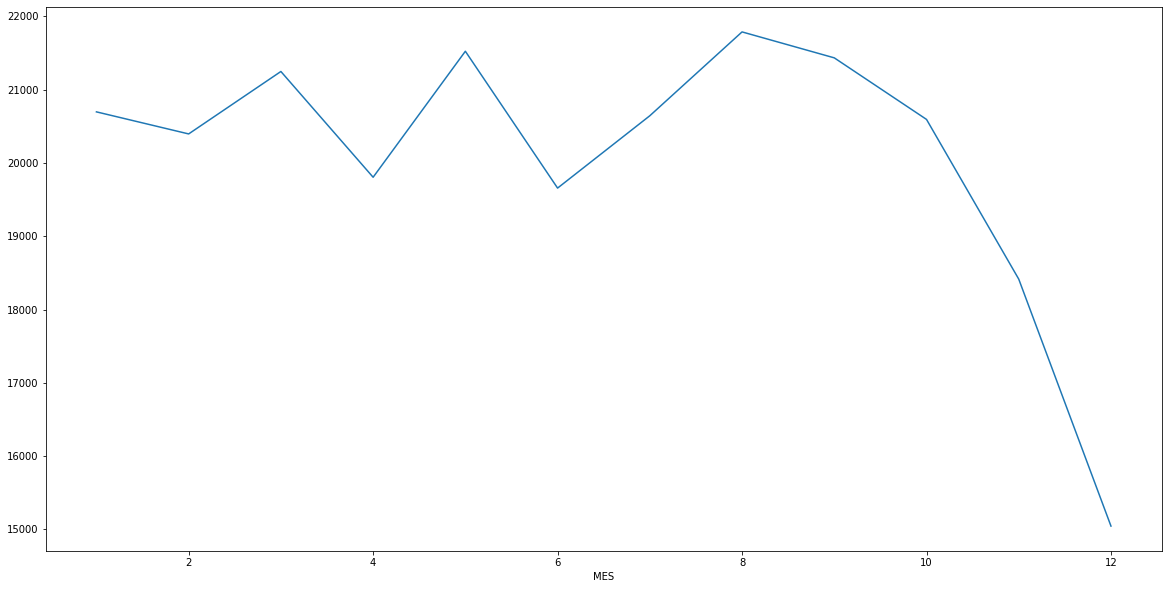

In [97]:
d  = df.groupby(['MES'])['CANTIDAD'].sum()
print(d)
d.plot(figsize=(20,10))

# Punto 5
5.	Para los casos en los que se disponga del detalle del delito o de una descripción, como por ejemplo en delitos sexuales y secuestro, ¿cuáles son los delitos, descripciones o modalidades más comunes?

Para la solución de este punto se agrupo por la columna delito que lista cada uno de los delitos cometidos y sumamos la cantidad para así dar con el top de delitos de todos los tiempos

In [ ]:
e = df
e = e.groupby('delito', as_index=False)['CANTIDAD'].sum().sort_values(by=['CANTIDAD'], ascending=False).head(3)
e

,delito,CANTIDAD
4,ARTÍCULO 209. ACTOS SEXUALES CON MENOR DE 14 AÑOS,78657
3,ARTÍCULO 208. ACCESO CARNAL ABUSIVO CON MENOR ...,54848
0,ARTÍCULO 205. ACCESO CARNAL VIOLENTO,37590
